# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | sanctuary point
Processing Record 3 of Set 1 | tacna
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | uturoa
Processing Record 6 of Set 1 | nova sintra
Processing Record 7 of Set 1 | talcahuano
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | damghan
Processing Record 10 of Set 1 | hammerfest
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | bardai
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | wynyard
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | thunder bay
Processing Record 21 of Set 1 | katsuren-haebaru
Processing Record 22 of Set 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,272.55,74,76,2.12,GS,1704074060
1,sanctuary point,-35.1114,150.6290,295.92,73,76,5.41,AU,1704074061
2,tacna,-18.0056,-70.2483,290.26,82,0,3.09,PE,1704074079
3,port-aux-francais,-49.3500,70.2167,278.38,80,79,14.97,TF,1704074062
4,uturoa,-16.7333,-151.4333,301.42,78,97,5.56,PF,1704074063


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

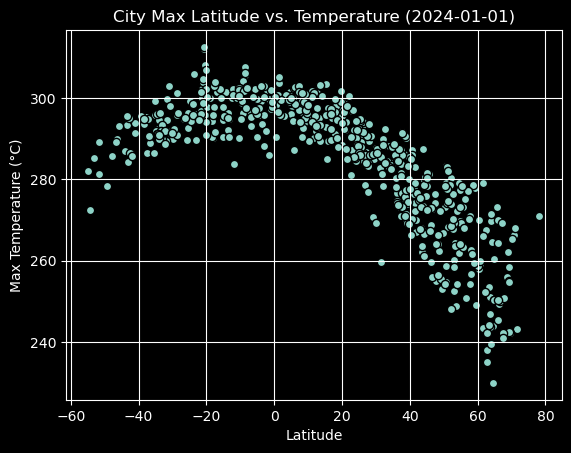

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp',grid=True, title="City Max Latitude vs. Temperature (2024-01-01)",edgecolors='black', s=35)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

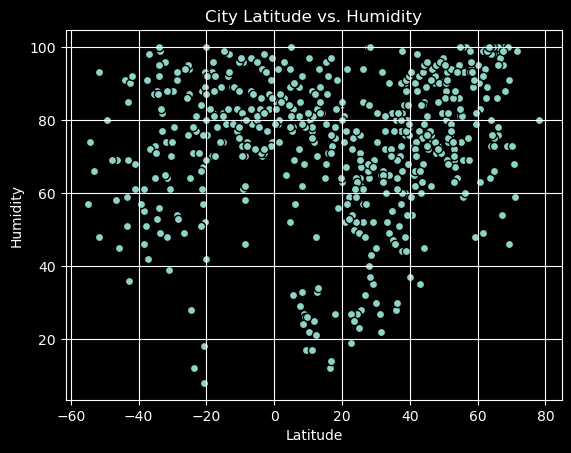

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity',grid=True, title="City Latitude vs. Humidity",edgecolors='black',s=35)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

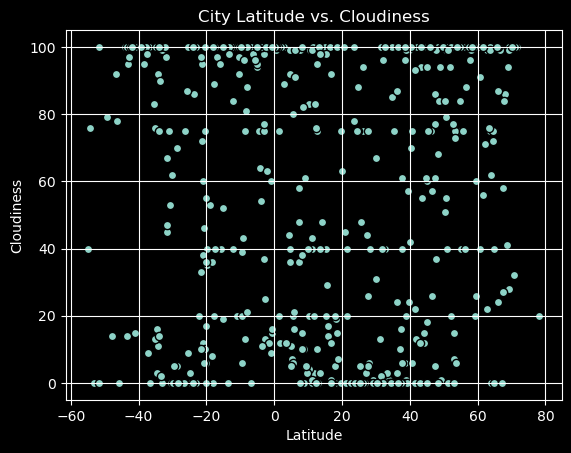

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness',grid=True, title="City Latitude vs. Cloudiness",edgecolors='black',s=35)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

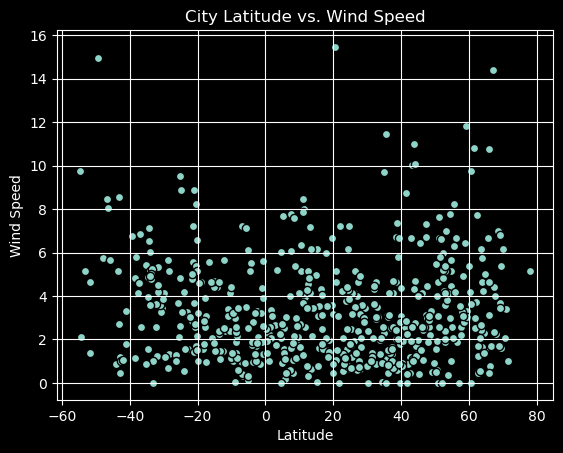

In [15]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed',grid=True, title="City Latitude vs. Wind Speed",edgecolors='black',s=35)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(df, title, y_values_column, title_ylabel):
    # set x and y values
    x_values = df['Lat']
    y_values = df[y_values_column]
    # linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # variable for calculation of regression line
    regress_values = x_values * slope + intercept
    # variable for equation of slope intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # scatter plot of weight and average tumor volume
    plt.scatter(x_values,y_values, edgecolors='black',s=35)
    # plot the line of the slope intercept equation
    plt.plot(x_values,regress_values,"red")
    # title and axis labels
    plt.title(title) #'Northern Hemisphere - Humidity (%) vs. Latitude\n with Linear Regression'
    plt.xlabel('Latitude')
    plt.ylabel(title_ylabel) #'Max Temperature (°C)'

    print(f"The r-value is: {rvalue}")
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,nova sintra,14.8667,-24.7167,295.87,64,100,4.95,CV,1704074081
7,georgetown,5.4112,100.3354,302.56,78,20,1.54,MY,1704074022
8,damghan,36.1683,54.3480,276.63,64,100,0.45,IR,1704074066
9,hammerfest,70.6634,23.6821,266.40,68,32,2.06,NO,1704074067
10,bilibino,68.0546,166.4372,241.79,88,86,2.24,RU,1704074068


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,272.55,74,76,2.12,GS,1704074060
1,sanctuary point,-35.1114,150.6290,295.92,73,76,5.41,AU,1704074061
2,tacna,-18.0056,-70.2483,290.26,82,0,3.09,PE,1704074079
3,port-aux-francais,-49.3500,70.2167,278.38,80,79,14.97,TF,1704074062
4,uturoa,-16.7333,-151.4333,301.42,78,97,5.56,PF,1704074063


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8731734111128143


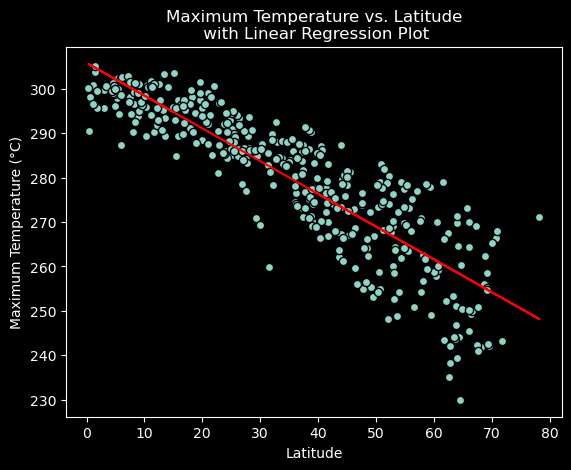

In [23]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Maximum Temperature vs. Latitude\n with Linear Regression Plot','Max Temp', 'Maximum Temperature (°C)')

The r-value is: 0.4121057168607245


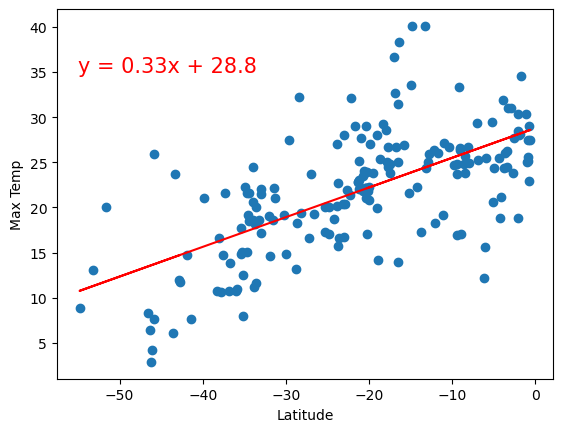

In [16]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Maximum Temperature vs. Latitude\n with Linear Regression Plot','Max Temp', 'Maximum Temperature (°C)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


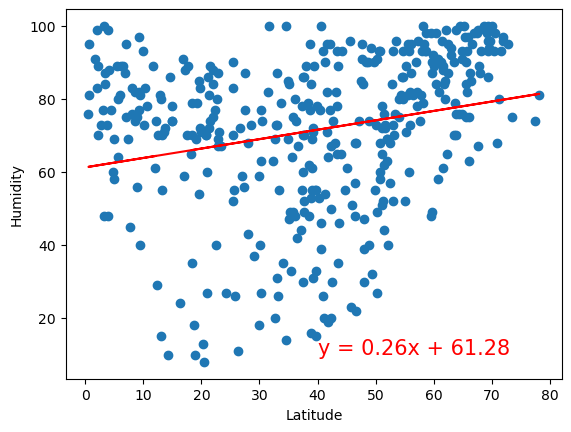

In [17]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Maximum Temperature vs. Latitude\n with Linear Regression Plot','Max Temp', 'Maximum Temperature (°C)')

The r-value is: 0.0002808747046324607


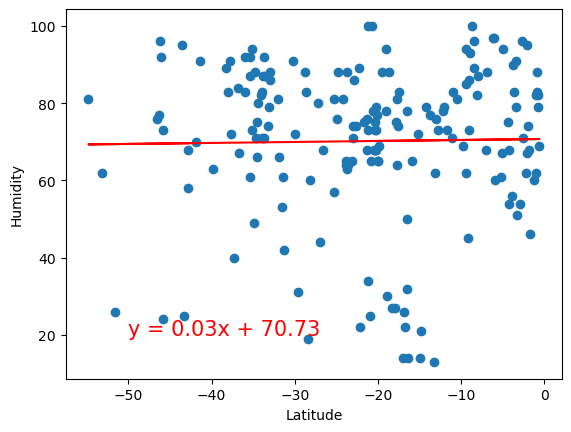

In [18]:
# Southern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Maximum Temperature vs. Latitude\n with Linear Regression Plot','Max Temp', 'Maximum Temperature (°C)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


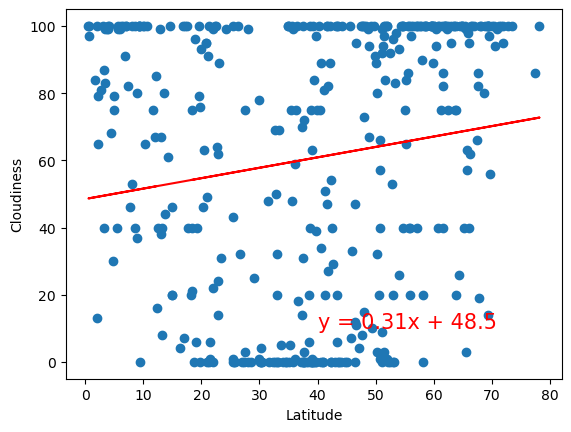

In [19]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Maximum Temperature vs. Latitude\n with Linear Regression Plot','Max Temp', 'Maximum Temperature (°C)')

The r-value is: 0.02056735429994368


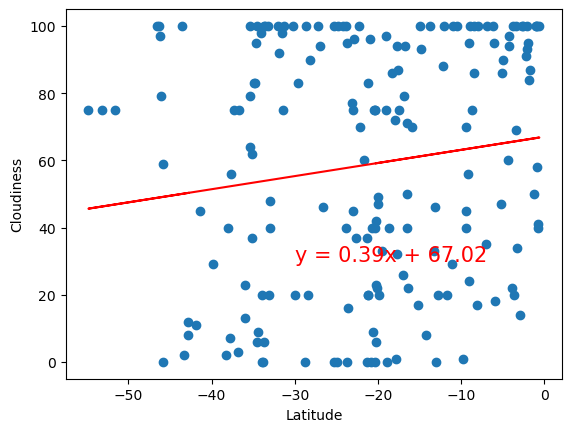

In [20]:
# Southern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Maximum Temperature vs. Latitude\n with Linear Regression Plot','Max Temp', 'Maximum Temperature (°C)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


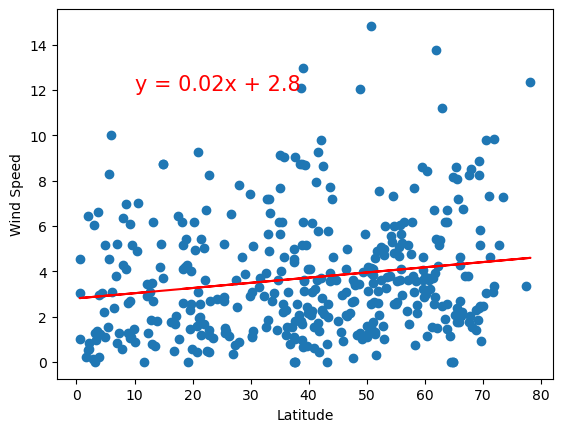

In [21]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Maximum Temperature vs. Latitude\n with Linear Regression Plot','Max Temp', 'Maximum Temperature (°C)')

The r-value is: 0.062239040700515696


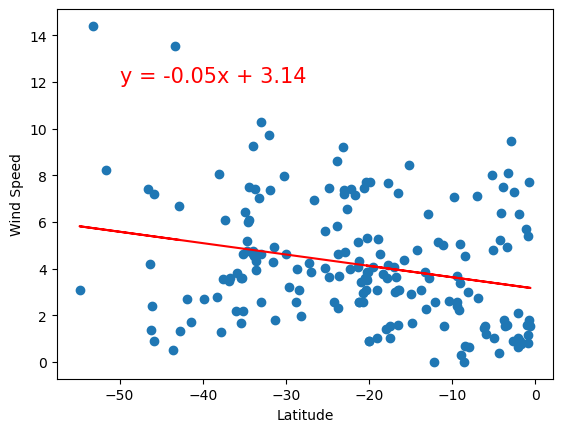

In [22]:
# Southern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Maximum Temperature vs. Latitude\n with Linear Regression Plot','Max Temp', 'Maximum Temperature (°C)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE